In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
pd.options.display.max_columns = 30
sns.set(style='ticks', context='talk') 

In [2]:
#Reading data from the CSV File.
auto = pd.read_csv('data/Auto_Insurance_Claims_Sample.csv')
auto.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#Listing the names of columns to check if any columns need to be renamed.
list(auto)


['Customer',
 'Country',
 'State Code',
 'State',
 'Claim Amount',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [4]:
#Renaming Column names and setting index to Customer.
column_names = {'Location Code': 'Location Type', 'Vehicle Class':'Vehicle Type', 'Monthly Premium Auto': 'Premium Per Month', 
                'Policy': 'Policy Name', 'EmploymentStatus': 'Employment Status', 'Months Since Policy Inception': 'Months Since Policy Inspection','Claim Amount':'Claim Demanded','Total Claim Amount':'Claim Sanctioned'
               ,'Effective To Date':'date'}
auto = (auto.rename(columns=column_names)
    [['Customer', 'Gender', 'Income','Employment Status','Education', 'Marital Status', 'Country','State','State Code','Location Type','Policy Name','Policy Type','Number of Policies','Premium Per Month','Coverage','Sales Channel','Vehicle Type','Vehicle Size','date','Claim Reason','Claim Demanded','Claim Sanctioned','Number of Open Complaints','Response','Months Since Last Claim','Months Since Policy Inspection']]
        .set_index('Customer', append=True)
        .rename_axis(["customer_id", "Customer"])
        .sort_index())
auto.head()

,,Gender,Income,Employment Status,Education,Marital Status,Country,State,State Code,Location Type,Policy Name,Policy Type,Number of Policies,Premium Per Month,Coverage,Sales Channel,Vehicle Type,Vehicle Size,date,Claim Reason,Claim Demanded,Claim Sanctioned,Number of Open Complaints,Response,Months Since Last Claim,Months Since Policy Inspection
customer_id,Customer,,,,,,,,,,,,,,,,,,,,,,,,,
0,BU79786,F,56274,Employed,Bachelor,Married,US,Kansas,KS,Suburban,Corporate L3,Corporate Auto,1,69,Basic,Agent,Two-Door Car,Medsize,2/24/11,Collision,276.351928,384.811147,0,No,32,5
1,QZ44356,F,0,Unemployed,Bachelor,Single,US,Nebraska,NE,Suburban,Personal L3,Personal Auto,8,94,Extended,Agent,Four-Door Car,Medsize,1/31/11,Scratch/Dent,697.953590,1131.464935,0,No,13,42
2,AI49188,F,48767,Employed,Bachelor,Married,US,Oklahoma,OK,Suburban,Personal L3,Personal Auto,2,108,Premium,Agent,Two-Door Car,Medsize,2/19/11,Collision,1288.743165,566.472247,0,No,18,38
3,WW63253,M,0,Unemployed,Bachelor,Married,US,Missouri,MO,Suburban,Corporate L2,Corporate Auto,7,106,Basic,Call Center,SUV,Medsize,1/20/11,Collision,764.586183,529.881344,0,No,18,65
4,HB64268,M,43836,Employed,Bachelor,Single,US,Kansas,KS,Rural,Personal L1,Personal Auto,1,73,Basic,Agent,Four-Door Car,Medsize,2/3/11,Collision,281.369258,138.130879,0,No,12,44


In [5]:
#As State Code and State represents same data deleting state column.
del auto['State']

auto.head()

,,Gender,Income,Employment Status,Education,Marital Status,Country,State Code,Location Type,Policy Name,Policy Type,Number of Policies,Premium Per Month,Coverage,Sales Channel,Vehicle Type,Vehicle Size,date,Claim Reason,Claim Demanded,Claim Sanctioned,Number of Open Complaints,Response,Months Since Last Claim,Months Since Policy Inspection
customer_id,Customer,,,,,,,,,,,,,,,,,,,,,,,,
0,BU79786,F,56274,Employed,Bachelor,Married,US,KS,Suburban,Corporate L3,Corporate Auto,1,69,Basic,Agent,Two-Door Car,Medsize,2/24/11,Collision,276.351928,384.811147,0,No,32,5
1,QZ44356,F,0,Unemployed,Bachelor,Single,US,NE,Suburban,Personal L3,Personal Auto,8,94,Extended,Agent,Four-Door Car,Medsize,1/31/11,Scratch/Dent,697.953590,1131.464935,0,No,13,42
2,AI49188,F,48767,Employed,Bachelor,Married,US,OK,Suburban,Personal L3,Personal Auto,2,108,Premium,Agent,Two-Door Car,Medsize,2/19/11,Collision,1288.743165,566.472247,0,No,18,38
3,WW63253,M,0,Unemployed,Bachelor,Married,US,MO,Suburban,Corporate L2,Corporate Auto,7,106,Basic,Call Center,SUV,Medsize,1/20/11,Collision,764.586183,529.881344,0,No,18,65
4,HB64268,M,43836,Employed,Bachelor,Single,US,KS,Rural,Personal L1,Personal Auto,1,73,Basic,Agent,Four-Door Car,Medsize,2/3/11,Collision,281.369258,138.130879,0,No,12,44


In [6]:
#Changing the date format for making further computation easy. 
auto.assign(date=lambda x: pd.to_datetime(x['date'], format='%m/%d/%y'))


,,Gender,Income,Employment Status,Education,Marital Status,Country,State Code,Location Type,Policy Name,Policy Type,Number of Policies,Premium Per Month,Coverage,Sales Channel,Vehicle Type,Vehicle Size,date,Claim Reason,Claim Demanded,Claim Sanctioned,Number of Open Complaints,Response,Months Since Last Claim,Months Since Policy Inspection
customer_id,Customer,,,,,,,,,,,,,,,,,,,,,,,,
0,BU79786,F,56274,Employed,Bachelor,Married,US,KS,Suburban,Corporate L3,Corporate Auto,1,69,Basic,Agent,Two-Door Car,Medsize,2011-02-24,Collision,276.351928,384.811147,0,No,32,5
1,QZ44356,F,0,Unemployed,Bachelor,Single,US,NE,Suburban,Personal L3,Personal Auto,8,94,Extended,Agent,Four-Door Car,Medsize,2011-01-31,Scratch/Dent,697.953590,1131.464935,0,No,13,42
2,AI49188,F,48767,Employed,Bachelor,Married,US,OK,Suburban,Personal L3,Personal Auto,2,108,Premium,Agent,Two-Door Car,Medsize,2011-02-19,Collision,1288.743165,566.472247,0,No,18,38
3,WW63253,M,0,Unemployed,Bachelor,Married,US,MO,Suburban,Corporate L2,Corporate Auto,7,106,Basic,Call Center,SUV,Medsize,2011-01-20,Collision,764.586183,529.881344,0,No,18,65
4,HB64268,M,43836,Employed,Bachelor,Single,US,KS,Rural,Personal L1,Personal Auto,1,73,Basic,Agent,Four-Door Car,Medsize,2011-02-03,Collision,281.369258,138.130879,0,No,12,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,M,71941,Employed,Bachelor,Married,US,MO,Urban,Personal L1,Personal Auto,2,73,Basic,Web,Four-Door Car,Medsize,2011-02-10,Hail,2340.598798,198.234764,0,No,18,89
9130,PK87824,F,21604,Employed,College,Divorced,US,MO,Suburban,Corporate L3,Corporate Auto,1,79,Extended,Branch,Four-Door Car,Medsize,2011-02-12,Collision,309.651122,379.200000,0,Yes,14,28
9131,TD14365,M,0,Unemployed,Bachelor,Single,US,MO,Suburban,Corporate L2,Corporate Auto,2,85,Extended,Branch,Four-Door Car,Medsize,2011-02-06,Collision,816.389043,790.784983,3,No,9,37


In [7]:
#Checking if there any null value in dataset
auto['Gender'].isnull().any()
auto['Income'].isnull().any()
auto['Employment Status'].isnull().any()

False

In [8]:
#Reseting the index
auto = auto.reset_index()

In [9]:
#Assigning index as customer_id.
auto = auto.set_index('customer_id')
# As customer is only value which need to be unique for this data set.Checking if there is any duplicated values in customer column
auto['Customer'].duplicated().any()

False

In [10]:
#Printing clean data set
auto.head()

,Customer,Gender,Income,Employment Status,Education,Marital Status,Country,State Code,Location Type,Policy Name,Policy Type,Number of Policies,Premium Per Month,Coverage,Sales Channel,Vehicle Type,Vehicle Size,date,Claim Reason,Claim Demanded,Claim Sanctioned,Number of Open Complaints,Response,Months Since Last Claim,Months Since Policy Inspection
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
0,BU79786,F,56274,Employed,Bachelor,Married,US,KS,Suburban,Corporate L3,Corporate Auto,1,69,Basic,Agent,Two-Door Car,Medsize,2/24/11,Collision,276.351928,384.811147,0,No,32,5
1,QZ44356,F,0,Unemployed,Bachelor,Single,US,NE,Suburban,Personal L3,Personal Auto,8,94,Extended,Agent,Four-Door Car,Medsize,1/31/11,Scratch/Dent,697.953590,1131.464935,0,No,13,42
2,AI49188,F,48767,Employed,Bachelor,Married,US,OK,Suburban,Personal L3,Personal Auto,2,108,Premium,Agent,Two-Door Car,Medsize,2/19/11,Collision,1288.743165,566.472247,0,No,18,38
3,WW63253,M,0,Unemployed,Bachelor,Married,US,MO,Suburban,Corporate L2,Corporate Auto,7,106,Basic,Call Center,SUV,Medsize,1/20/11,Collision,764.586183,529.881344,0,No,18,65
4,HB64268,M,43836,Employed,Bachelor,Single,US,KS,Rural,Personal L1,Personal Auto,1,73,Basic,Agent,Four-Door Car,Medsize,2/3/11,Collision,281.369258,138.130879,0,No,12,44


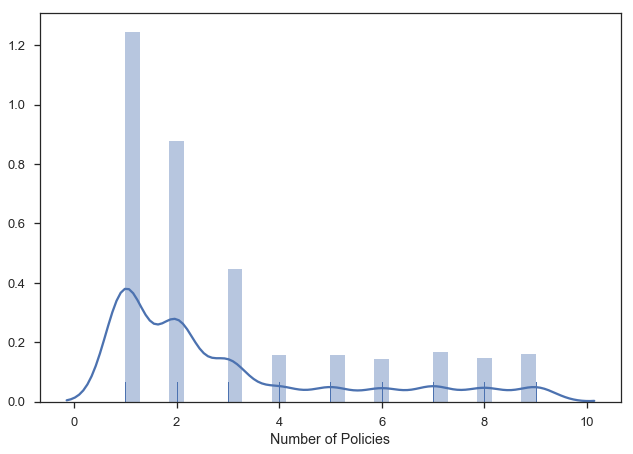

In [11]:
sns.distplot(auto['Number of Policies'],kde = True, rug = True)
#Plotting histogram for Number of Policies to find how many policies a person is holding.
#As you see, Most of the people holds only 1 policy while some people holds even 9 policies

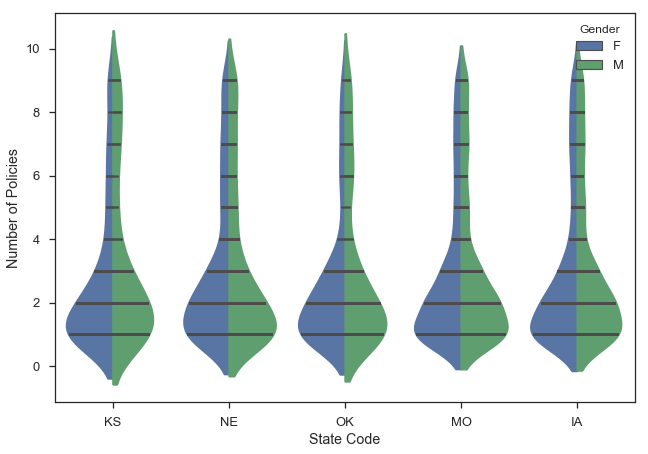

In [12]:
#Plotting a violin plot to see how many male and female in a particular state holds how many policies
sns.violinplot(x="State Code", y="Number of Policies", hue="Gender", data=auto,
               split=True, inner="stick");

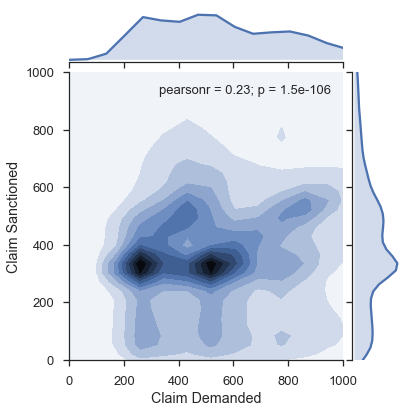

In [13]:
#Plotting joint plot Claim Demanded Versus Claim Sanctioned of with KDE kind of graph. 
#As we see, most of the claim sanctioned and demanded as around $300
sns.jointplot(x='Claim Demanded',y='Claim Sanctioned',data=auto,kind='kde',xlim={0,1000},ylim={0,1000})

(0, 1000)

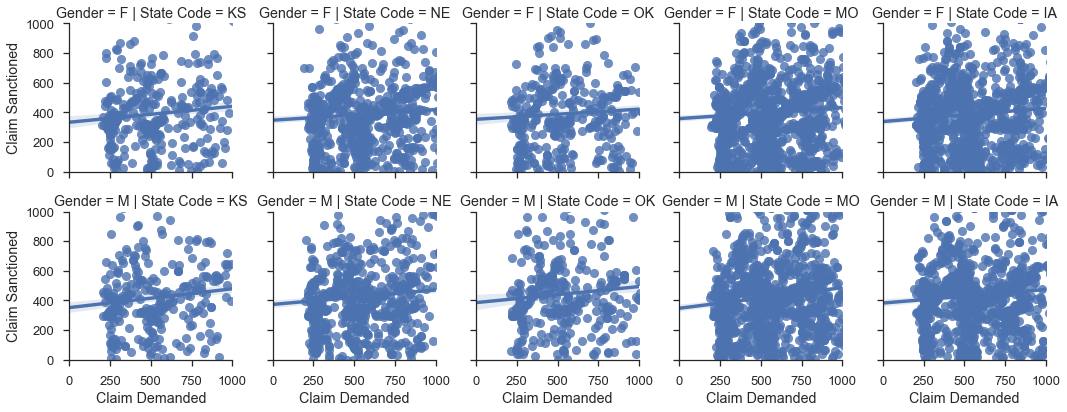

In [15]:
#Plotting LMPlot to see relation between claim sanctioned and claim demanded for each gender in particular State.
g= sns.lmplot(x="Claim Demanded", y="Claim Sanctioned", row="Gender", col="State Code",data=auto, size=3,scatter=True)
axes = g.axes
axes[0,0].set_xlim(0,1000)
axes[0,1].set_ylim(0,1000)

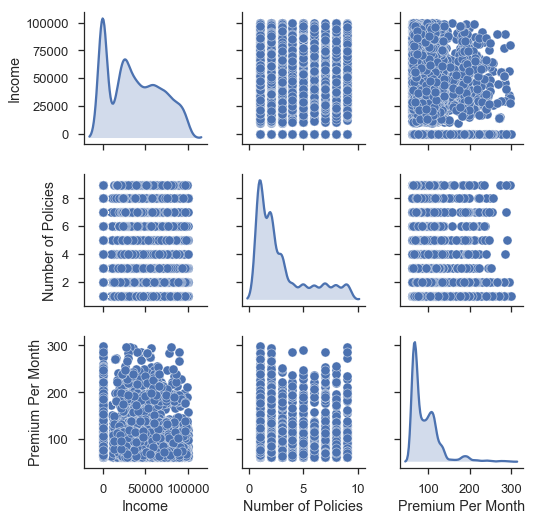

In [16]:
# Plotting pair plot for Income v/s Number of Policies v/s Premium Per Month
g = sns.pairplot(auto, diag_kind="kde",vars= ["Income","Number of Policies","Premium Per Month"]
                 ,diag_kws=dict(shade=True))

## References

1. https://seaborn.pydata.org/generated/seaborn.lmplot.html
2. http://seaborn.pydata.org/generated/seaborn.pairplot.html
3. http://seaborn.pydata.org/generated/seaborn.jointplot.html
4. https://seaborn.pydata.org/generated/seaborn.distplot.html
5. https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid 
6. https://seaborn.pydata.org/generated/seaborn.violinplot.html
7. http://www.scan-support.com/help/sample-data-sets